# Introduction to machine learning - Linear Regression from scratch using gradient descent, in R
Our goal is to predict people's heights ($y$) from their measured shoe sizes ($x$) using a simple linear regression model: 

$y=b_0 +b_1x$.

### 1. Create artificial data
We will start by generating an artificial dataset for the problem. This is a common practice in machine learning literature - for example, to study the performance of algorithms while knowing the true underlying relationships between the target variable and the predictors.

Here, we will assume a linear relationship between shoe size and height. To make it more realistic, we will add some random, <a href="https://r-lang.com/rnorm-function-in-r/">normally distributed</a> noise. Feel free to play with the generated number of samples, `n_samples`.

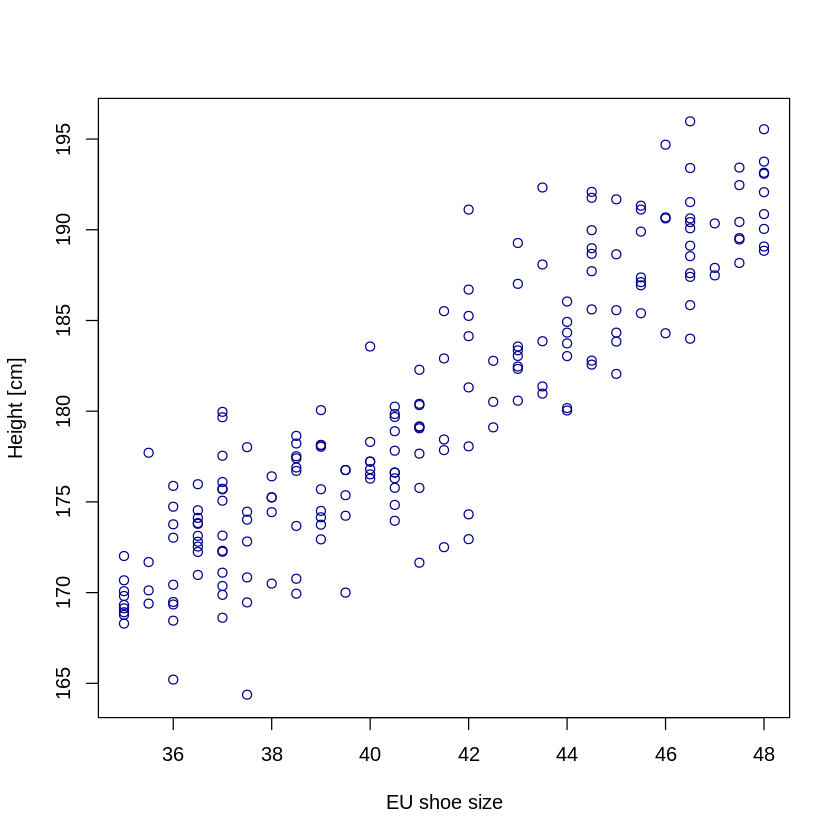

In [1]:
n_samples  = 200  # number of artificial observations we will generate
true_bias  = 110  # True value for parameter b_0
true_slope <- 1.7 # True value for parameter b_1

make_random_shoesizes = function(n) {
  ### Draws n numbers randomly between 35 and 48 with a step size of 0.5
  return(sample(seq(35, 48, by=0.5), n, replace=TRUE))
}

# Predictors, independent variable (i.e. random shoe sizes)
x = make_random_shoesizes(n_samples)
# Target, dependent variable (i.e. height in cm), with added random noise (normally distributed)
y = true_bias + true_slope * x + 3 * rnorm(n_samples)

plot(x, y, xlab="EU shoe size", ylab="Height [cm]", col="darkblue")

Our simple linear regression model is:

$y = b_0 + b_1 x$

where $y$ is the predicted person's height, $x$ is the shoesize, and $b_0$ and $b_1$ are the parameters can adapt to fit the model (bias and slope, respectively). 

We choose Mean Squared Error (MSE) as the cost function to minimize:

$MSE = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2$

where $y_i$ are the true observations (heights) and $\hat{y}_i$ are the corresponding predictions from the linear regression above. $n$ is the total 
number of randomly generated samples.

In [2]:
### Function to calculate the Mean square error (MSE), see lecture
calculate_mse = function(y_obs, y_pred){
  # Number of samples
  n = length(y_obs)
  # Variable to store the sum of squared residuals in each iteration
  sum_squared_residuals = 0
  for(idx in 1:n){
    sum_squared_residuals = ( sum_squared_residuals + 
        (y_obs[idx] - y_pred[idx])^2 )
  }
  return(sum_squared_residuals / n)
}

Now, lets generate some $b_1$ values around the "true" value in steps of 0.1 to
test how this parameter influences the output of the cost function defined above, i.e., how "moving the regression line away from the observations" affects our mean squared error.

In [3]:
range_b_1 = seq(true_slope-1, true_slope+1, by=0.01)
print(range_b_1)

  [1] 0.70 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84
 [16] 0.85 0.86 0.87 0.88 0.89 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99
 [31] 1.00 1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.10 1.11 1.12 1.13 1.14
 [46] 1.15 1.16 1.17 1.18 1.19 1.20 1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29
 [61] 1.30 1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.40 1.41 1.42 1.43 1.44
 [76] 1.45 1.46 1.47 1.48 1.49 1.50 1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59
 [91] 1.60 1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.70 1.71 1.72 1.73 1.74
[106] 1.75 1.76 1.77 1.78 1.79 1.80 1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89
[121] 1.90 1.91 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.00 2.01 2.02 2.03 2.04
[136] 2.05 2.06 2.07 2.08 2.09 2.10 2.11 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19
[151] 2.20 2.21 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.30 2.31 2.32 2.33 2.34
[166] 2.35 2.36 2.37 2.38 2.39 2.40 2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.49
[181] 2.50 2.51 2.52 2.53 2.

For this purpose, we will implement the cost function as a function of the parameter we want to optimize, i.e., we calculate the MSE as a function of $b_1$. Note that for simplification and demonstration purposes we will assume that we know the value of $b_0$ already.

$MSE(b_1) = \frac{1}{n} \sum\limits_{i=1}^n (y_i - (b_0 + b_1x_i))^2$

In [4]:
### Function to calculate MSE as a function of parameter b1 (slope) only ###
calculate_mse_for_b1 = function(b1) {

  # Instantiate vector in which predictions will be stored
  predictions = vector("numeric", length = n_samples)

  for(sample_idx in 1:n_samples){
    # For-loop to make predictions for each sample (written out for clarity,
    # but it would be computationally more efficient to "vectorize" this loop)
    cur_prediction = true_bias + b1 * x[sample_idx]
    predictions[sample_idx] = cur_prediction
  }
  ### Finally, calculate the MSE between true obs. and the predictions
  ### using the RMSE function defined above
  return(calculate_mse(y, predictions))
}

Next, we will use linear regression with each distinct $b_1$ value in `range_b_1` and plot how the different values affect the MSE.

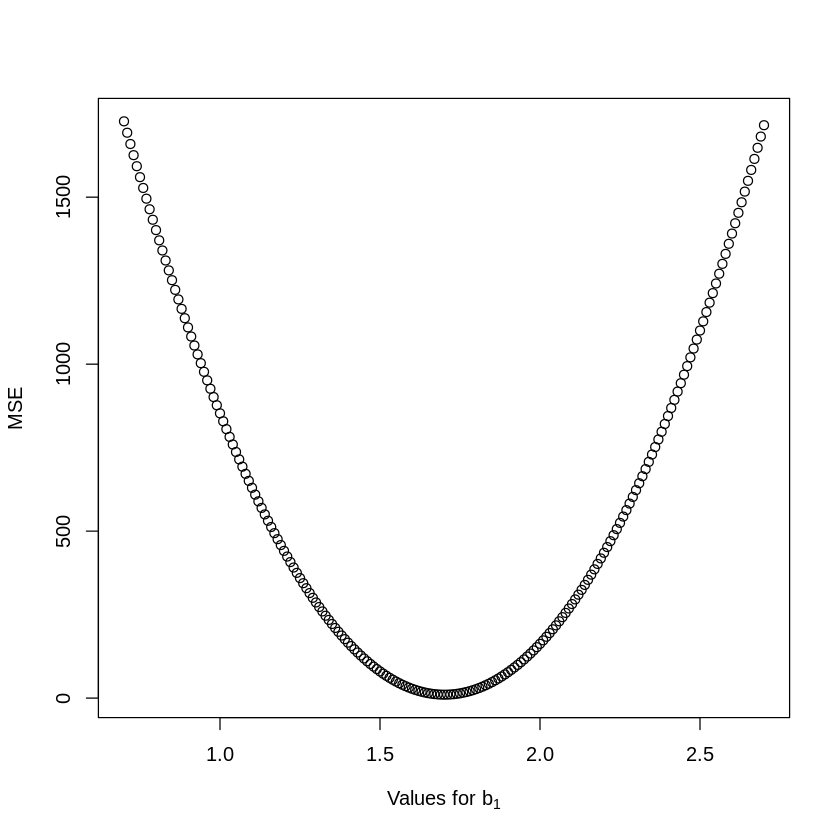

In [5]:
# Instantiate a vector to store the MSE-values that using different "b1" in the  
# lin. reg. formula will give us (OBS: bias left constant for simplification)
mse_results <- vector("numeric", length = length(range_b_1))

for(idx in 1:length(range_b_1)){
  # Calculate the MSE at the different values for b1 generated above, store in
  # the vector
  mse_results[idx] = calculate_mse_for_b1(range_b_1[idx])
}
# Plot results
plot(range_b_1, mse_results, ylab="MSE", xlab=expression("Values for b"[1]))

Now, we need a function to calculate the partial derivative of the cost function at any arbitrary $b_1$. The derivative with respect to $b_1$ is given as:

$MSE'(b_1) =  \frac{1}{n} \sum\limits_{i=1}^n 2(y_i - (b_0 + b_1x_i))(-x_i)$

If you want to derive this function yourself, it will be helpful to refresh your knowledge about the [chain rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/v/chain-rule-introduction).

In [6]:
part_deriv_at_b1 = function(b1){
  sum = 0
  for(sample_idx in 1:n_samples){
    sum = sum + 2*(y[sample_idx] - 
    (true_bias + b1*x[sample_idx]))*(-x[sample_idx])
  } 
  return((1/n_samples) * sum)
}

The return value will give us the slope of the tangent at $b_1$ (--> first derivative with respect to $b_1$). Lets plot this tangent for one arbitrary value in `range_b_1`.

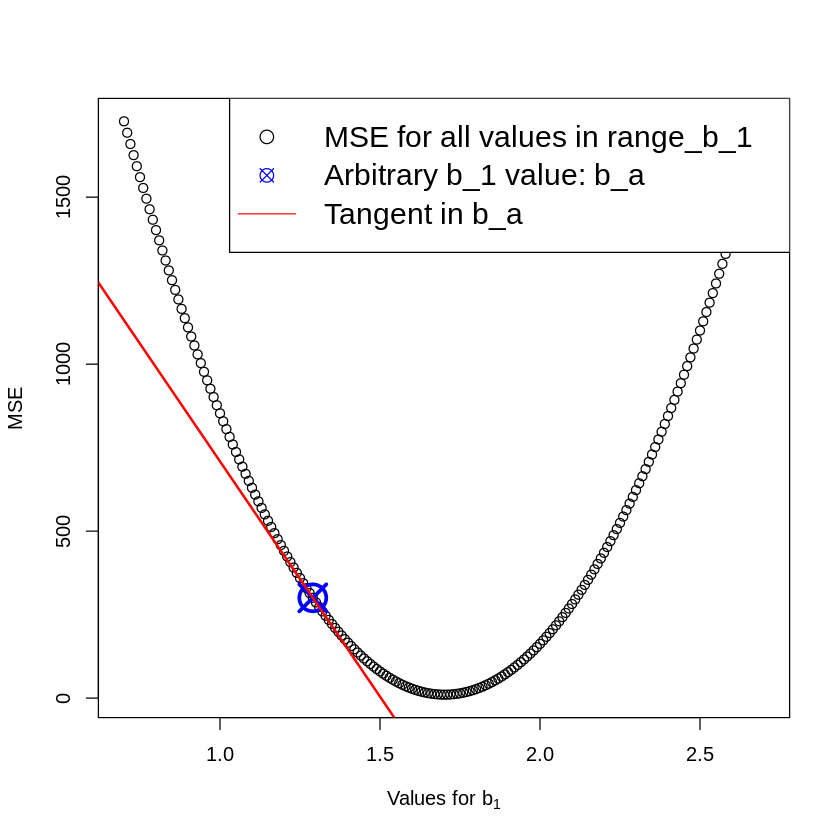

In [7]:
# Use an arbitrary value from "range_b_1"
b_test = range_b_1[60]
# Calculate the corresponding MSE
mse_test = calculate_mse_for_b1(b_test)

# Calculate derivative (f'(x)) of the cost function at b_test
# --> this gives us the slope of the tangent
cost_slope = part_deriv_at_b1(b_test)
# To plot the tangent, we also need to calculate the bias (y=mx+b => b=y-mx)
cost_bias = mse_test - cost_slope*b_test

### Visualize and test
plot(range_b_1, mse_results, ylab="MSE", xlab=expression("Values for b"[1]))
points(b_test, mse_test, pch=13, lwd=3, cex=3, col="blue")
abline(cost_bias, cost_slope, col="red", lwd=2)
legend("topright", 
       legend=c("MSE for all values in range_b_1", "Arbitrary b_1 value: b_a",
        "Tangent in b_a"),
       col=c("black", "blue", "red"),
       pch=c(1,13,NA),lty=c(NA,NA,1),
       cex = 1.5)

Finally, it's time to update the value for $b_1$ in small steps to approach the minimum of the cost function (i.e., to optimize it over time). Accordingly, we "follow the direction (slope) of the tangent in small steps until we get very close to the minimum" (--> gradient descent).

1.   Start at an arbitrary parameter value for $b_1$ (--> initialize $b_1$ randomly. Remember, usually we don't know the true value for $b_1$ or the shape of the cost function, which most commonly has higher dimensions).
2.   Calculate the partial derivative of the cost function (MSE) with respect to the current value of $b_1$.
3.   Update the parameter using gradient descent --> "walk a small step towards the direction that guides to the minimum". This is the corresponding algorithm in pseudo code:

```
b_1 = 1.3       # initial value for b1, often chosen randomly
alpha = 0.0001  # Learning rate

while (n_iterations < predefined_threshold) or 
(change_in_b1 > predefined_threshold) {

  b_1 = b_1 - alpha * cost_fn_partial_derivative(b_1)

}
```

where the size of the steps we will take is determined by $\alpha$ (--> the **learning rate**), we will experiment with this below. Simply put, the larger the alpha, the larger the "jumps" between the current $b_1$ and the updated $b_1$.

In [8]:
gradient_descent = function(b1_init, n_iterations=200, learning_rate=0.0001) {

  b1_optim = b1_init

  for(iter in 1:n_iterations) {
    b1_optim = b1_optim - (learning_rate * part_deriv_at_b1(b1_optim))
  }

  return(b1_optim)
}

In [9]:
# Perform a simple test
b1_optim = gradient_descent(b1_init = 1.3, learning_rate = 0.0001)
print(b1_optim)

[1] 1.701695


Nice! Using the set-up above, we're getting very close to the initial value (`true_slope`)! 

Let's check how using different values for $\alpha$ affects the quality of our results. $\alpha$ is an example for a **[hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning))**, i.e., a parameter that controls the learning process and is not derived via model training. More on this later in the lecture.

In [10]:
test_alphas = seq(from=0.00001, to=0.0006, by=0.00001)
print(test_alphas)

 [1] 0.00001 0.00002 0.00003 0.00004 0.00005 0.00006 0.00007 0.00008 0.00009
[10] 0.00010 0.00011 0.00012 0.00013 0.00014 0.00015 0.00016 0.00017 0.00018
[19] 0.00019 0.00020 0.00021 0.00022 0.00023 0.00024 0.00025 0.00026 0.00027
[28] 0.00028 0.00029 0.00030 0.00031 0.00032 0.00033 0.00034 0.00035 0.00036
[37] 0.00037 0.00038 0.00039 0.00040 0.00041 0.00042 0.00043 0.00044 0.00045
[46] 0.00046 0.00047 0.00048 0.00049 0.00050 0.00051 0.00052 0.00053 0.00054
[55] 0.00055 0.00056 0.00057 0.00058 0.00059 0.00060


We will now play around with the hyperparameters a bit. Feel free to change the values for `test_alphas`, `test_iterations`, and the initial value for $b_1$, `b1_init`!

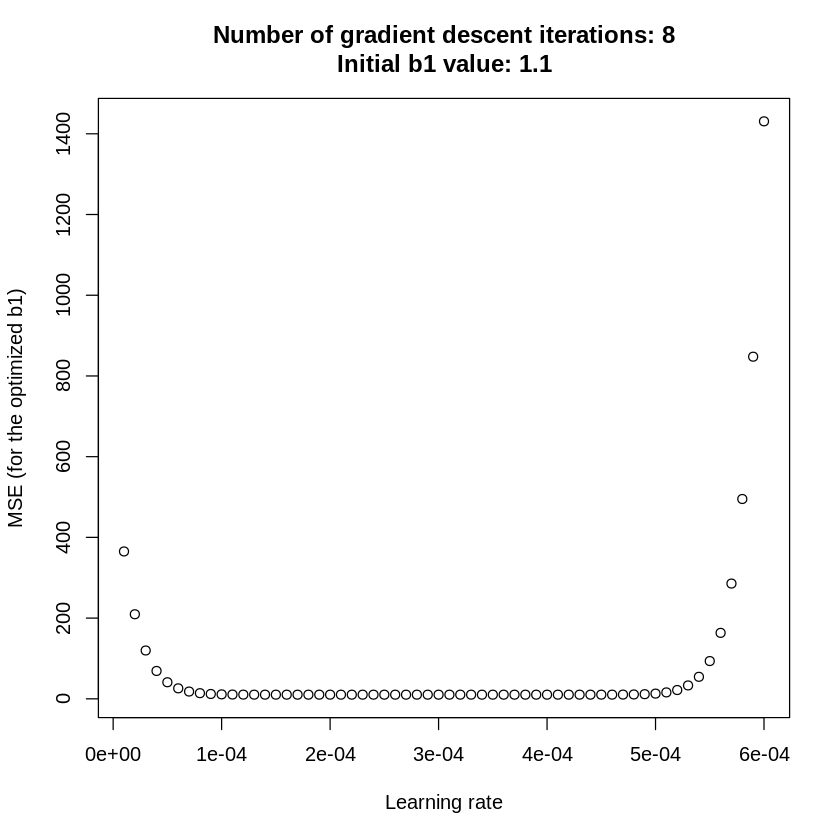

In [11]:
mse_vector = vector("numeric", length = length(test_alphas))
test_iterations = 8
b1_init = 1.1

for(idx in 1:length(test_alphas)){
  cur_optim_b1 = gradient_descent(b1_init = b1_init, 
    learning_rate = test_alphas[idx], n_iterations=test_iterations)
  # Calculate MSE
  mse_vector[idx] = calculate_mse_for_b1(cur_optim_b1)
}

plot(test_alphas, mse_vector, xlab="Learning rate", 
 ylab="MSE (for the optimized b1)",
 main=paste0("Number of gradient descent iterations: ", test_iterations,"\nInitial b1 value: ",b1_init))

## Bringing it all together
We have now implemented a full gradient descent optimization procedure for one tunable paramter using simple linear regression from scratch - hooray!

Finally, let's visualize the "learning process" to make sure we completely understand what's going on :)

In the next code cell, we will start at a user defined value for $b_0$ and use 10 iterations to update the parameter using the gradient descent method. To visualize what is happening in each iteration, we will plot both the current linear regression line and the respective value of the cost function.

In [12]:
### Helper functions

plot_data_regline = function(x, y, b1) {
  # Plot data
  plot(x, y, xlab="EU shoe size", ylab="Height [cm]", col="darkblue")
  # Plot regression
  abline(true_bias, b1, col="red", lwd=2)
}

plot_cost_at_b1 = function(b1) {
  # Calculate the corresponding MSE
  mse_b1 = calculate_mse_for_b1(b1)

  # Calculate derivative (f'(x)) of the cost function at b_test
  # --> this gives us the slope of the tangent
  cost_slope = part_deriv_at_b1(b1)
  # To plot the tangent, we also need to calculate the bias (y=mx+b => b=y-mx)
  cost_bias = mse_b1 - cost_slope*b1

  ### Visualize and test
  plot(range_b_1, mse_results, ylab="MSE", xlab=expression("Values for b"[1]))
  points(b1, mse_b1, pch=13, lwd=3, cex=3, col="blue")
  abline(cost_bias, cost_slope, col="red", lwd=2)
  legend("topright", 
        legend=c("MSE for all values in range_b_1", "cur. b_1 value",
          "Tangent in b_1"),
        col=c("black", "blue", "red"),
        pch=c(1,13,NA),lty=c(NA,NA,1),
        cex = 1.5)
}

[1] "Starting to optimize b1. Initial value for b1: 1"
[1] "Iteration 1, current value of b1:1.24012516401738"


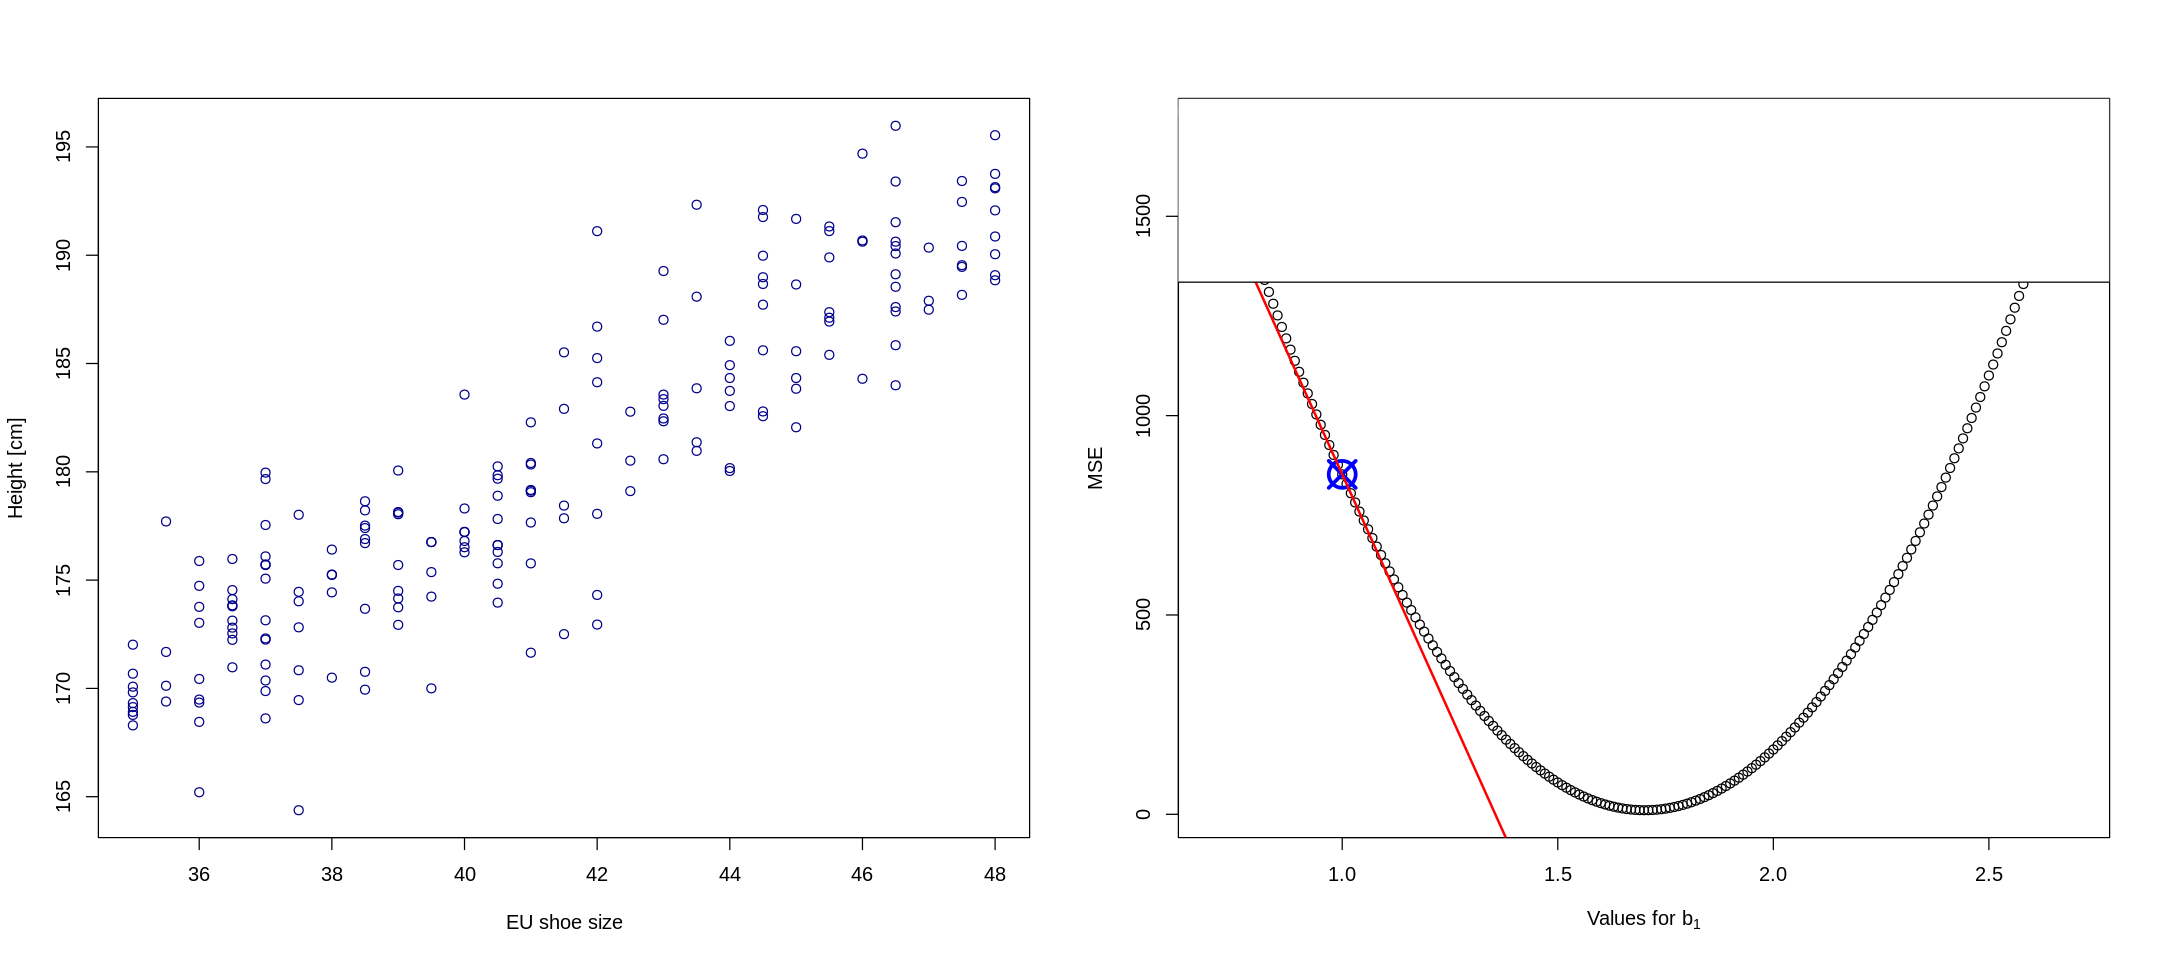

[1] "Iteration 2, current value of b1:1.39807775600058"


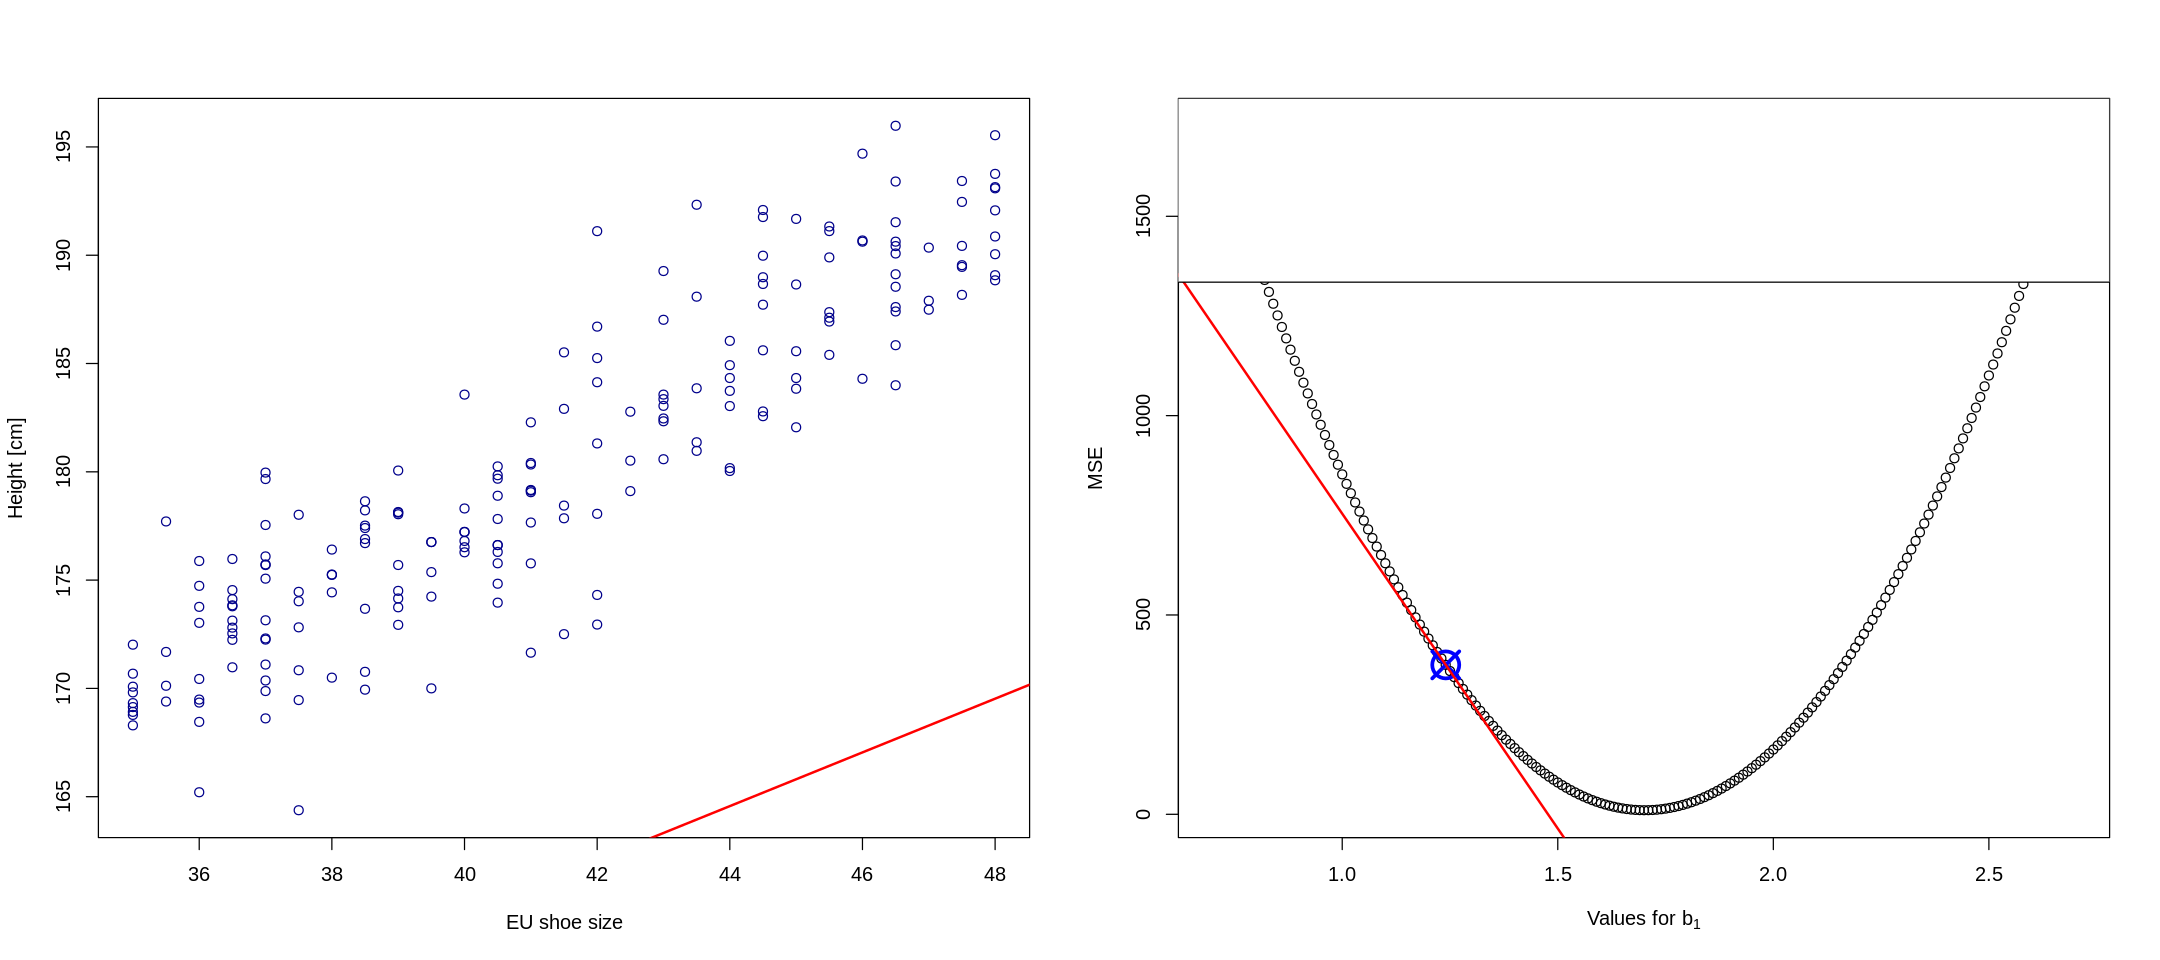

[1] "Iteration 3, current value of b1:1.50197782585083"


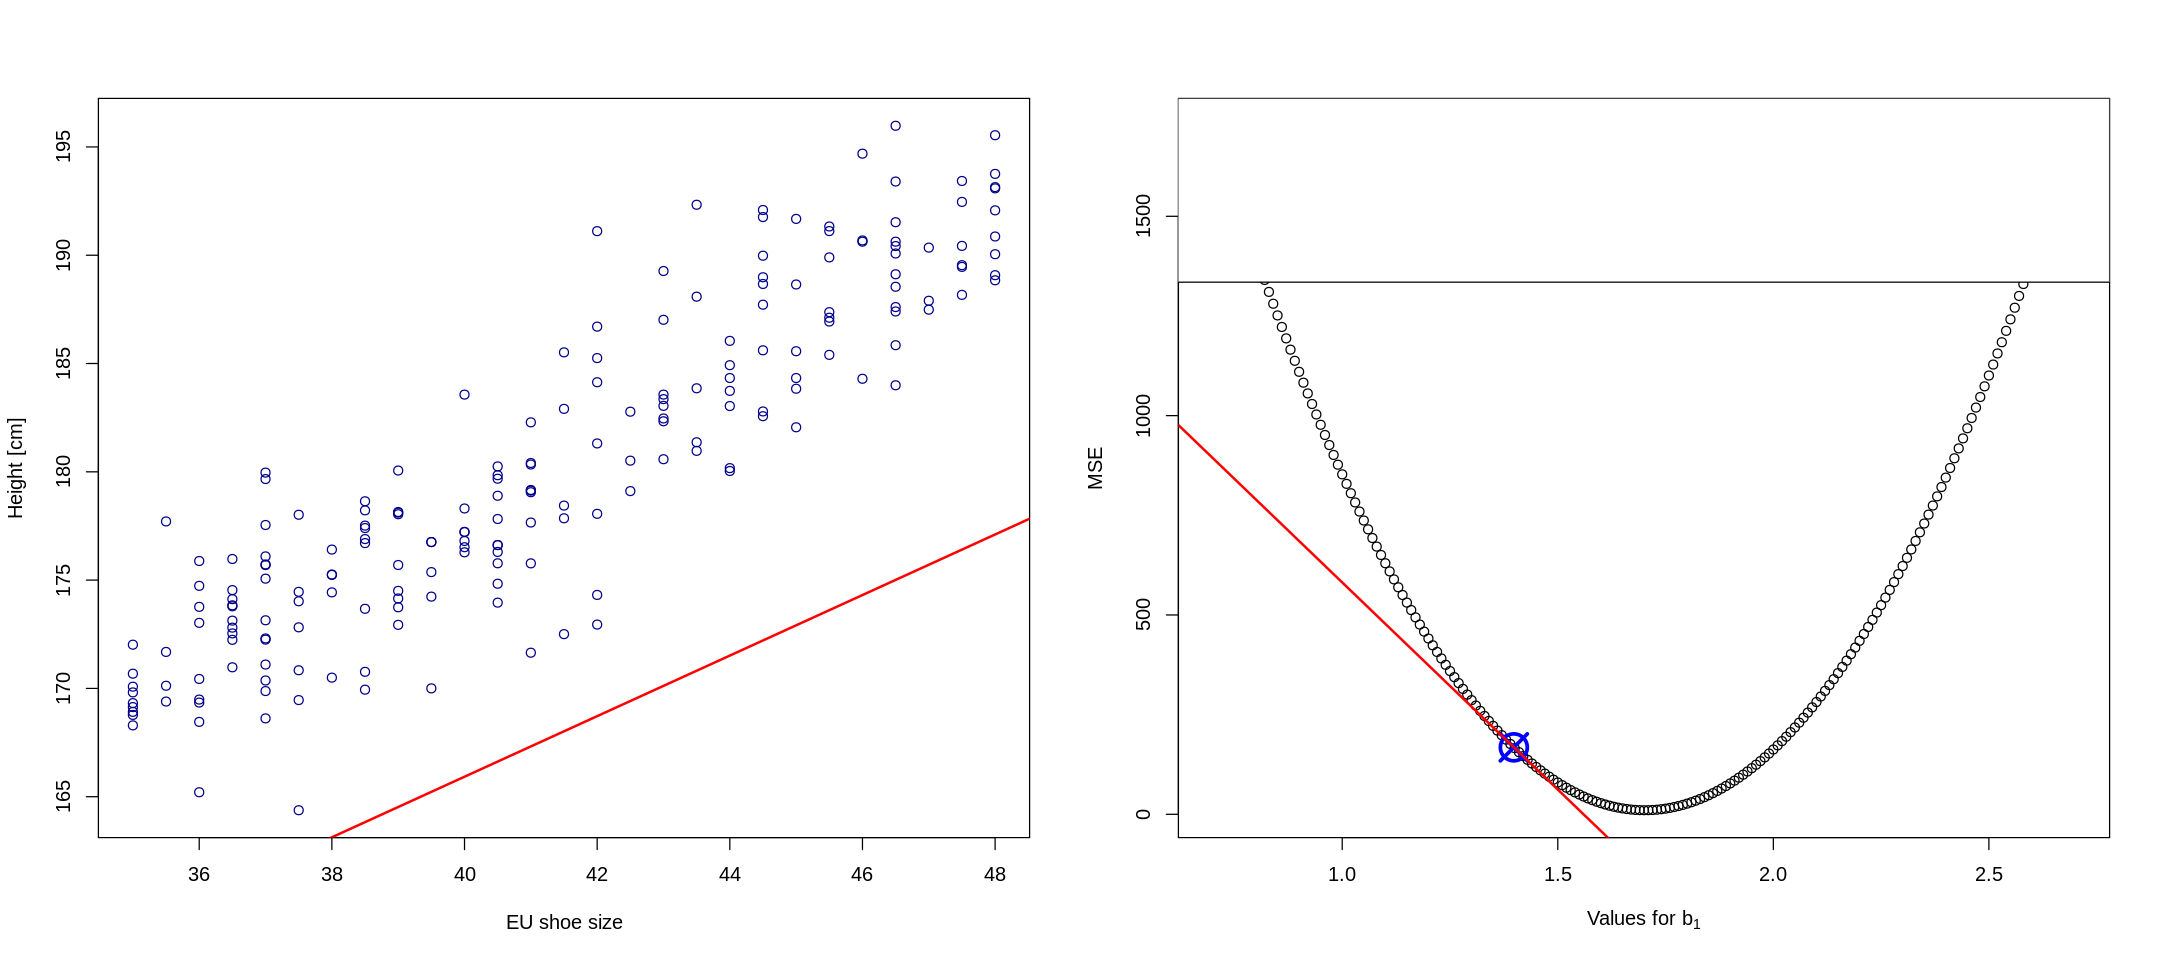

[1] "Iteration 4, current value of b1:1.57032253852282"


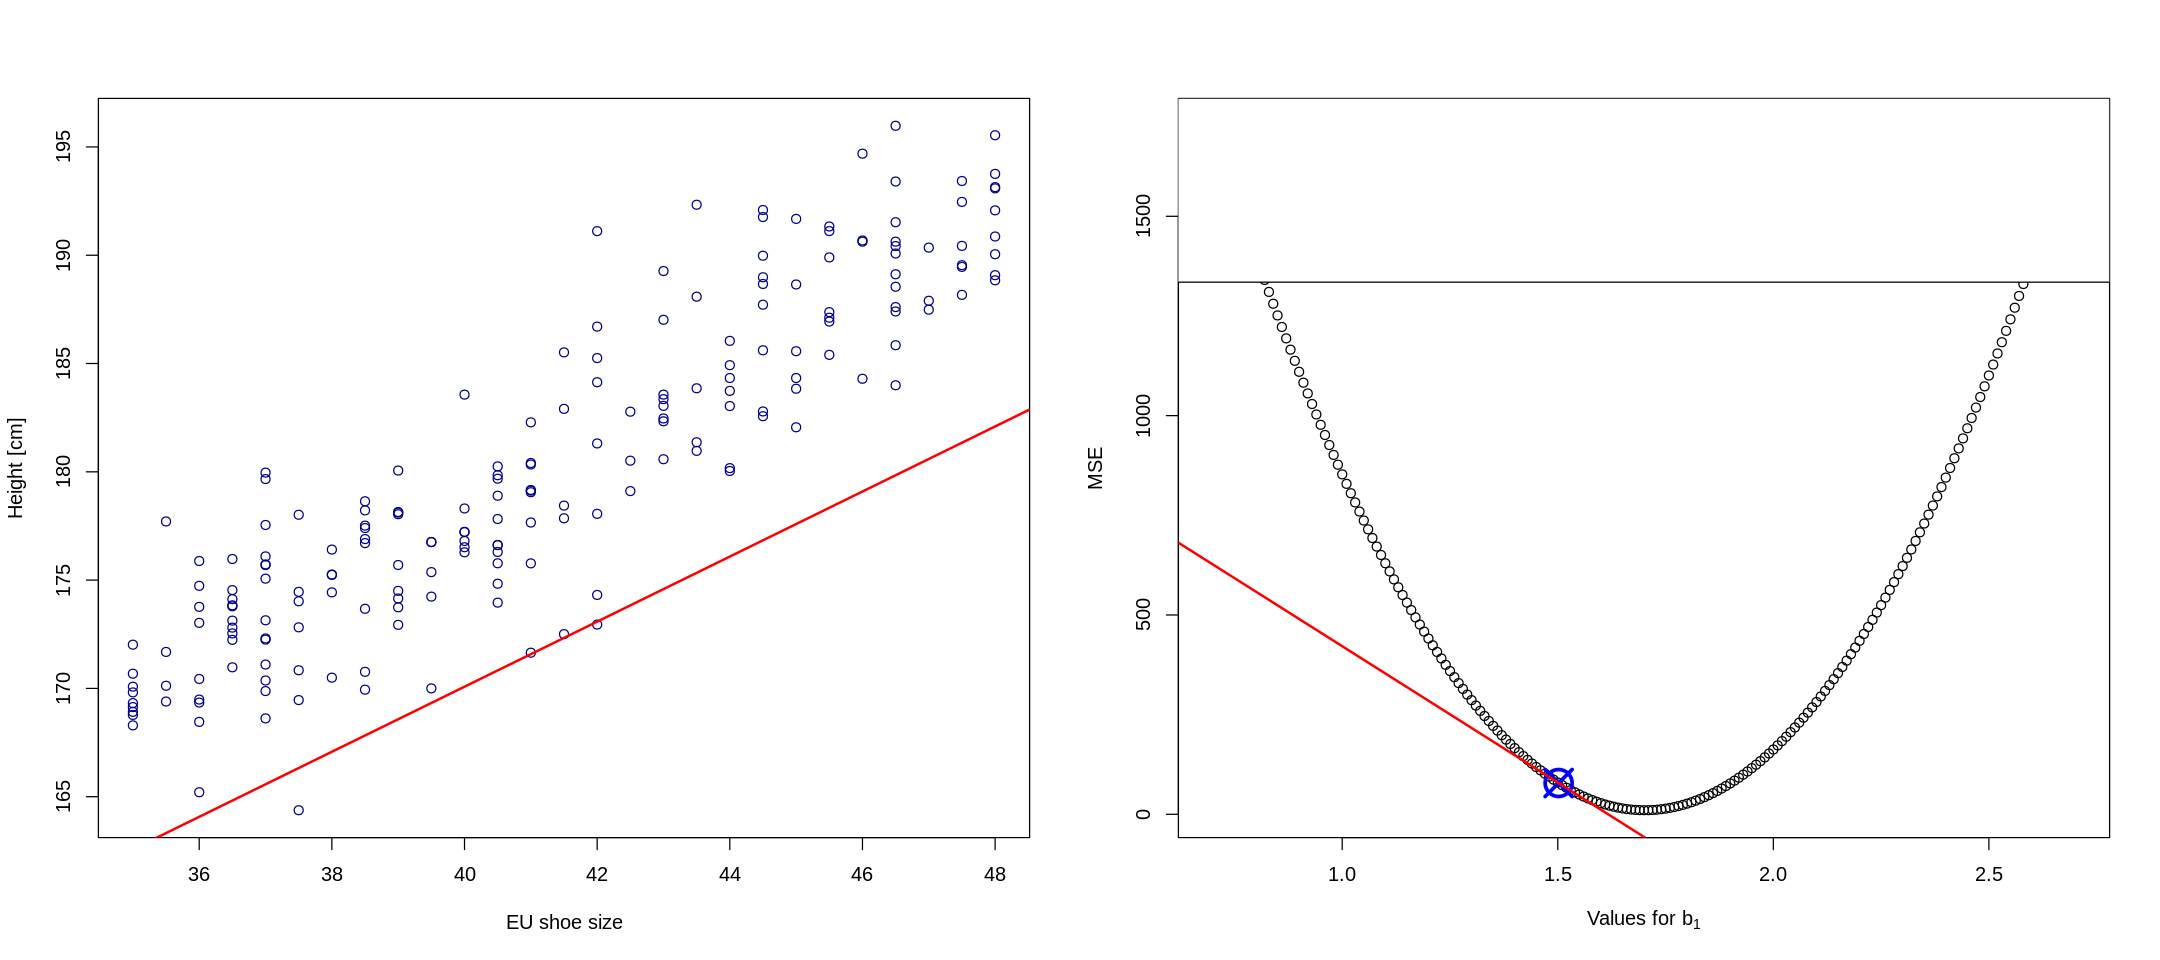

[1] "Iteration 5, current value of b1:1.61527919501929"


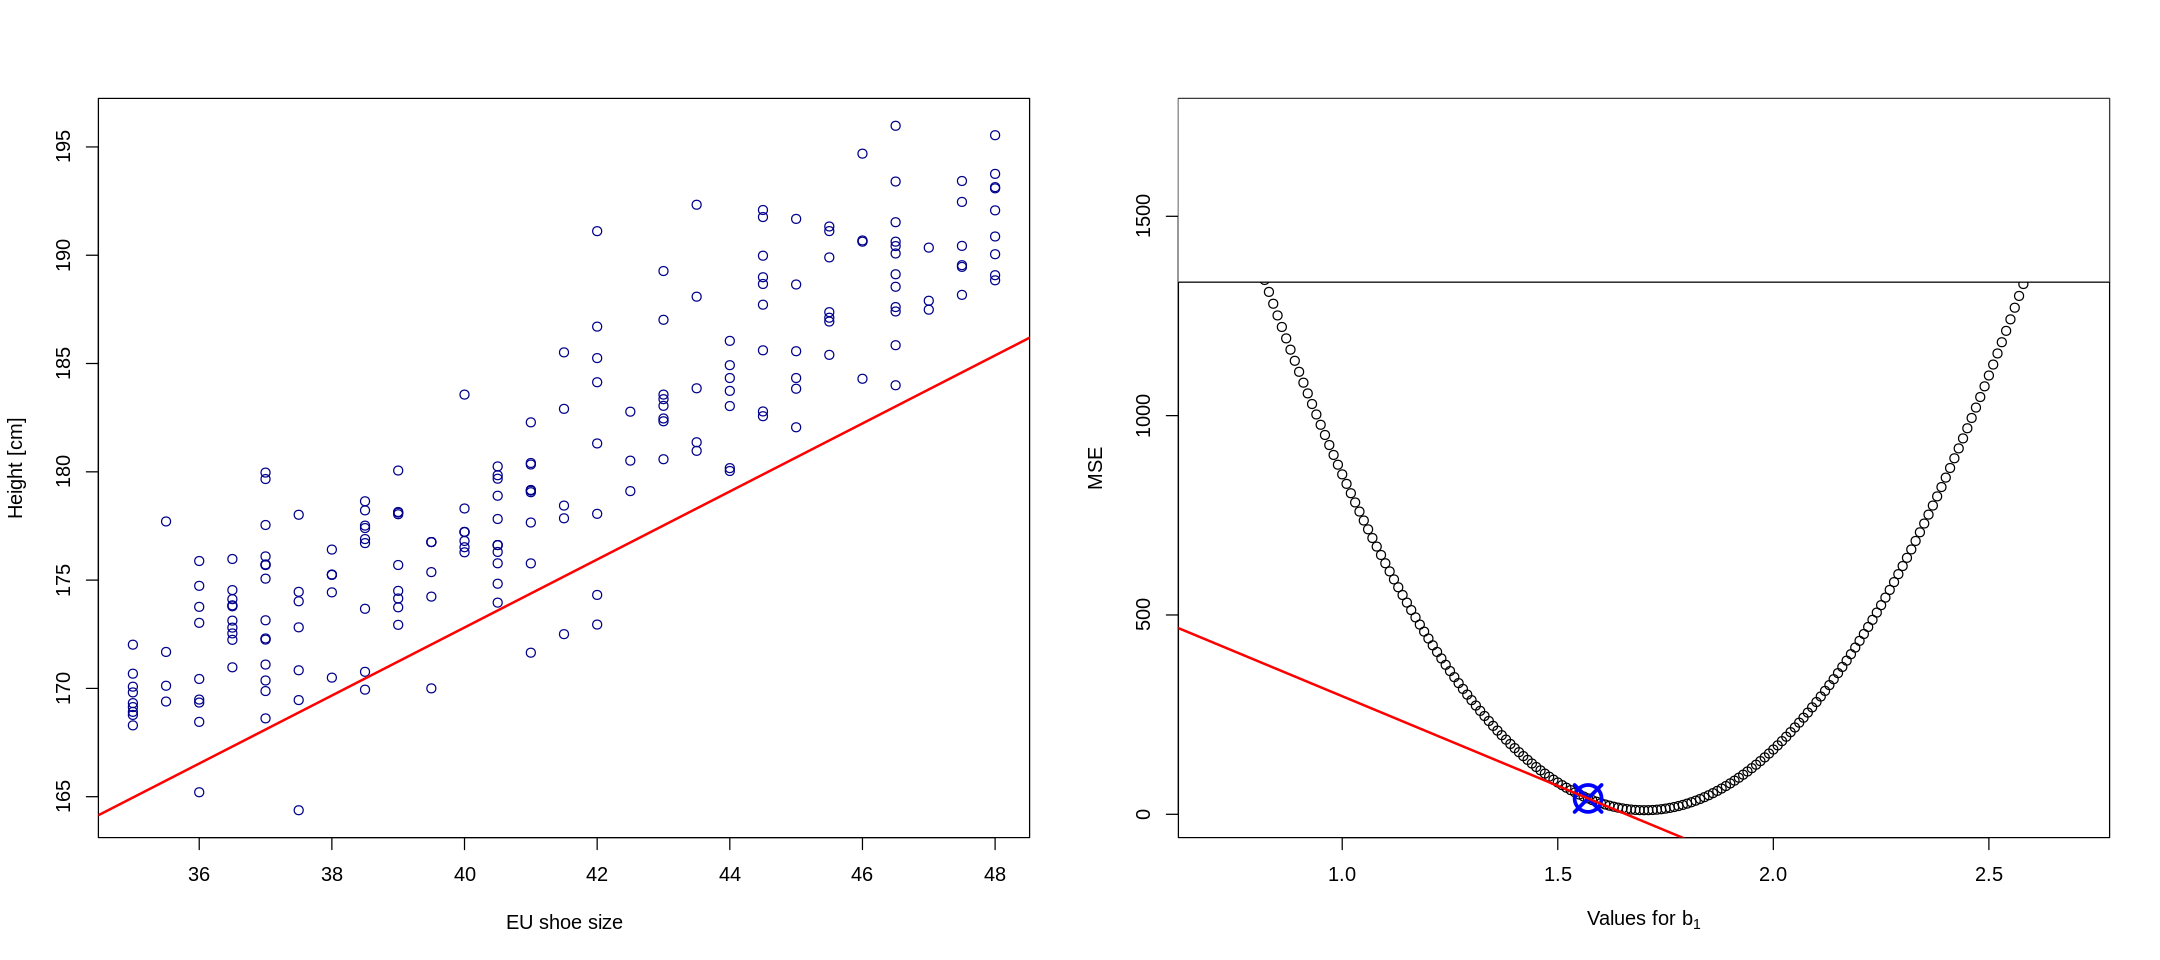

[1] "Iteration 6, current value of b1:1.6448513577269"


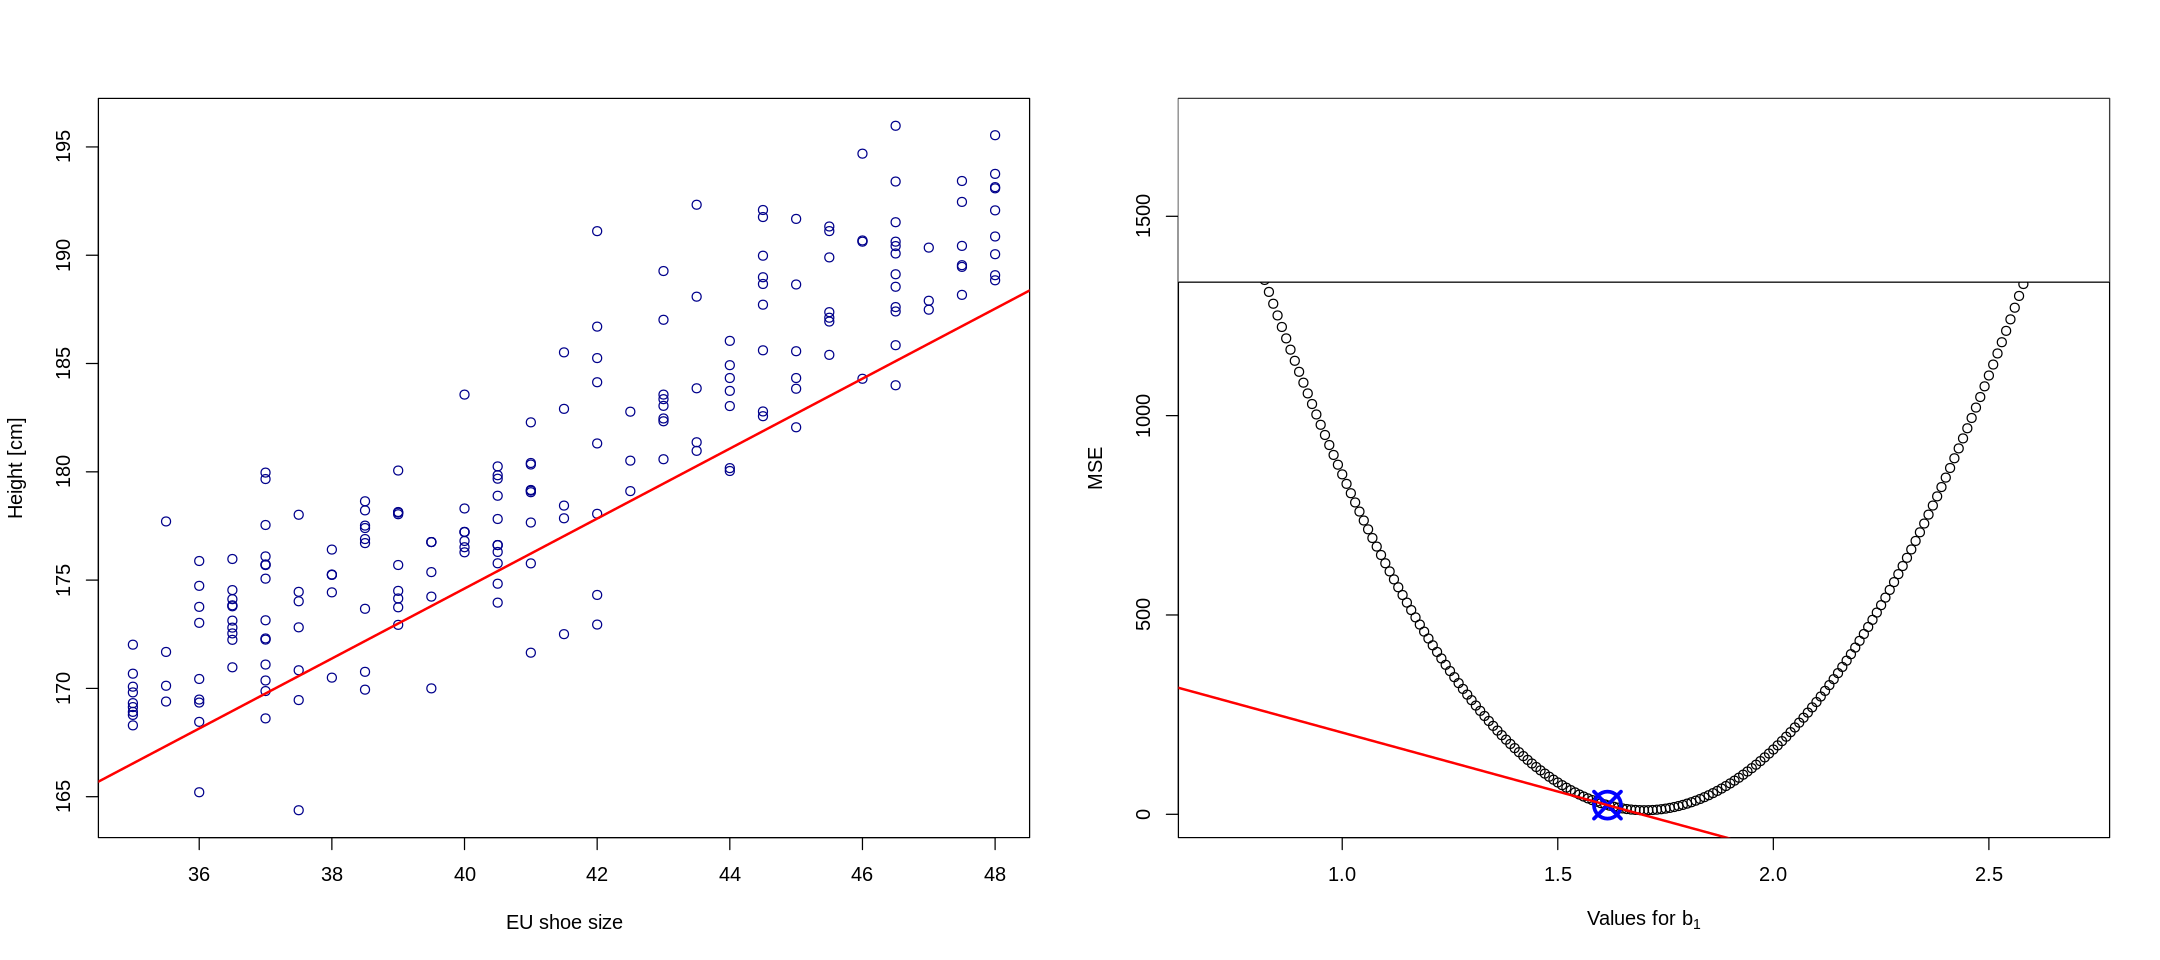

[1] "Iteration 7, current value of b1:1.6643037119578"


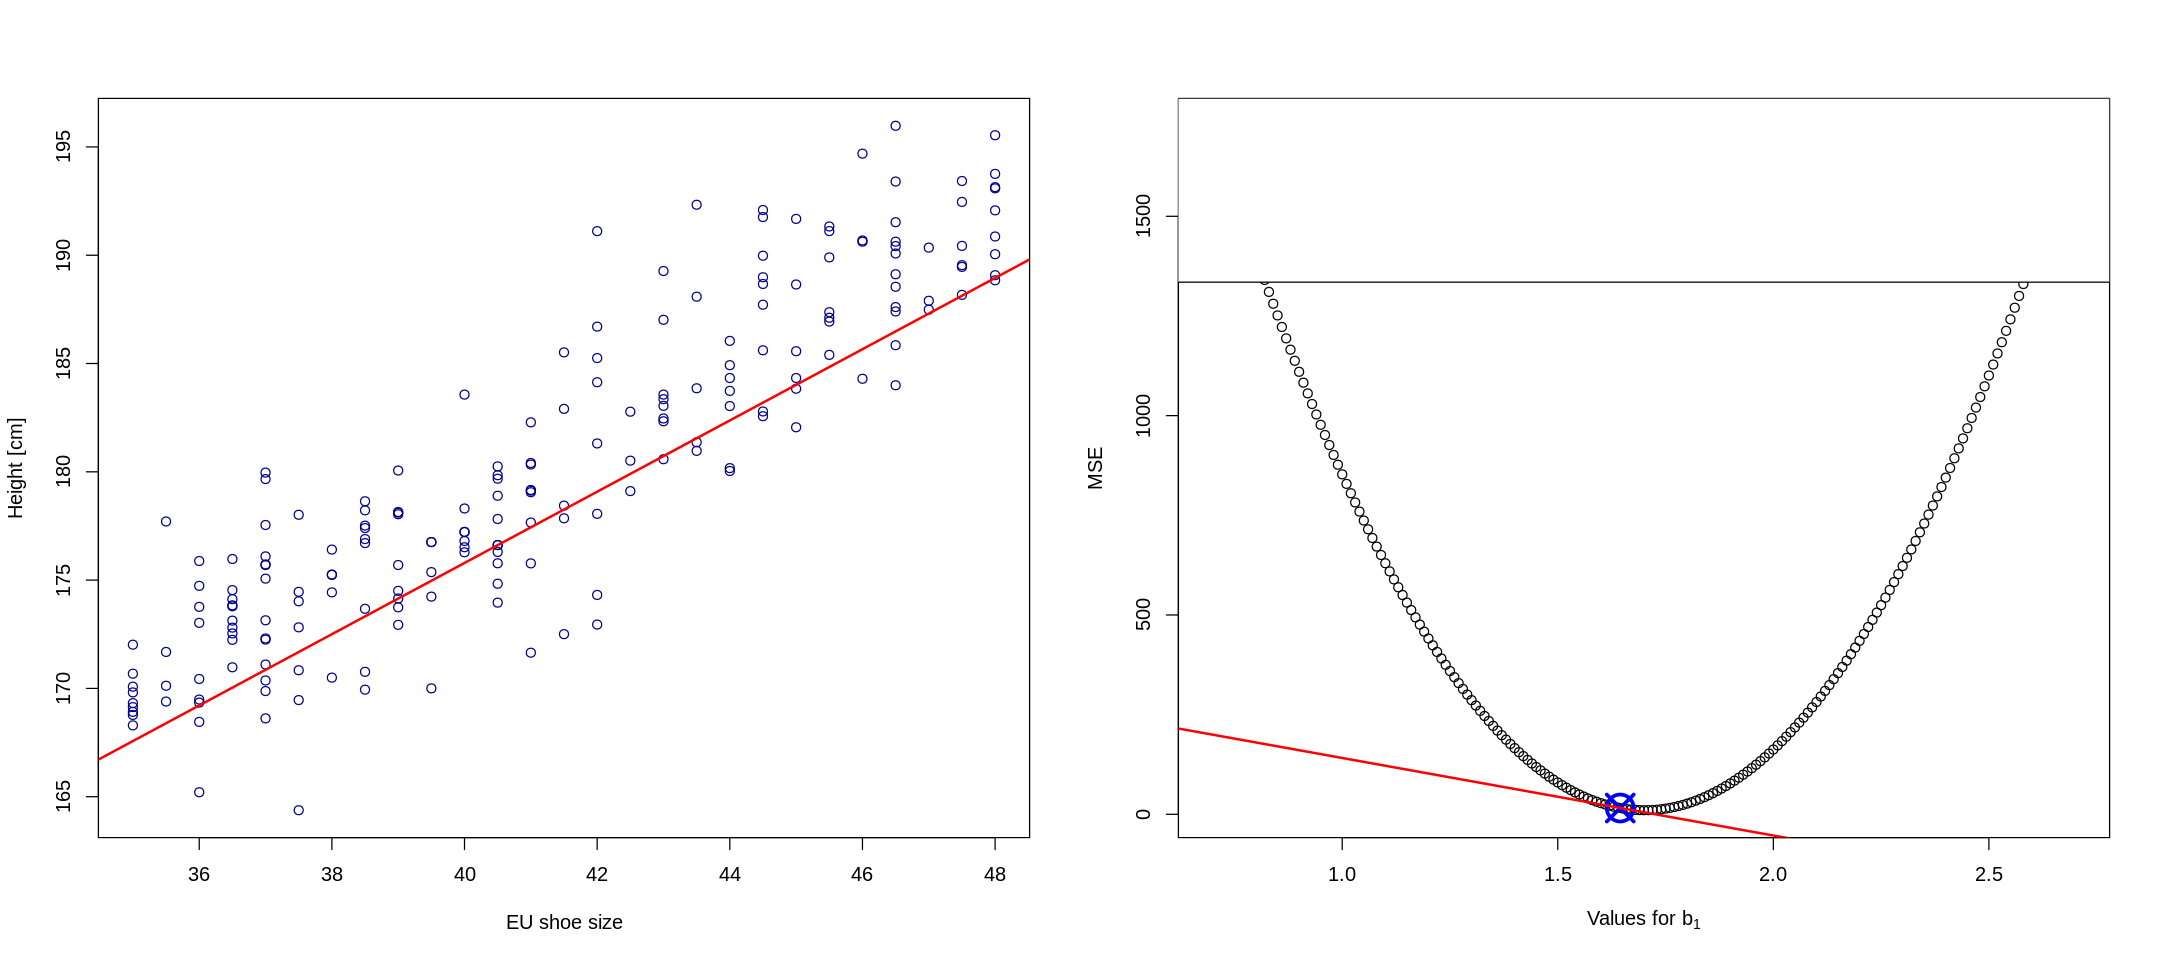

[1] "Iteration 8, current value of b1:1.67709932954131"


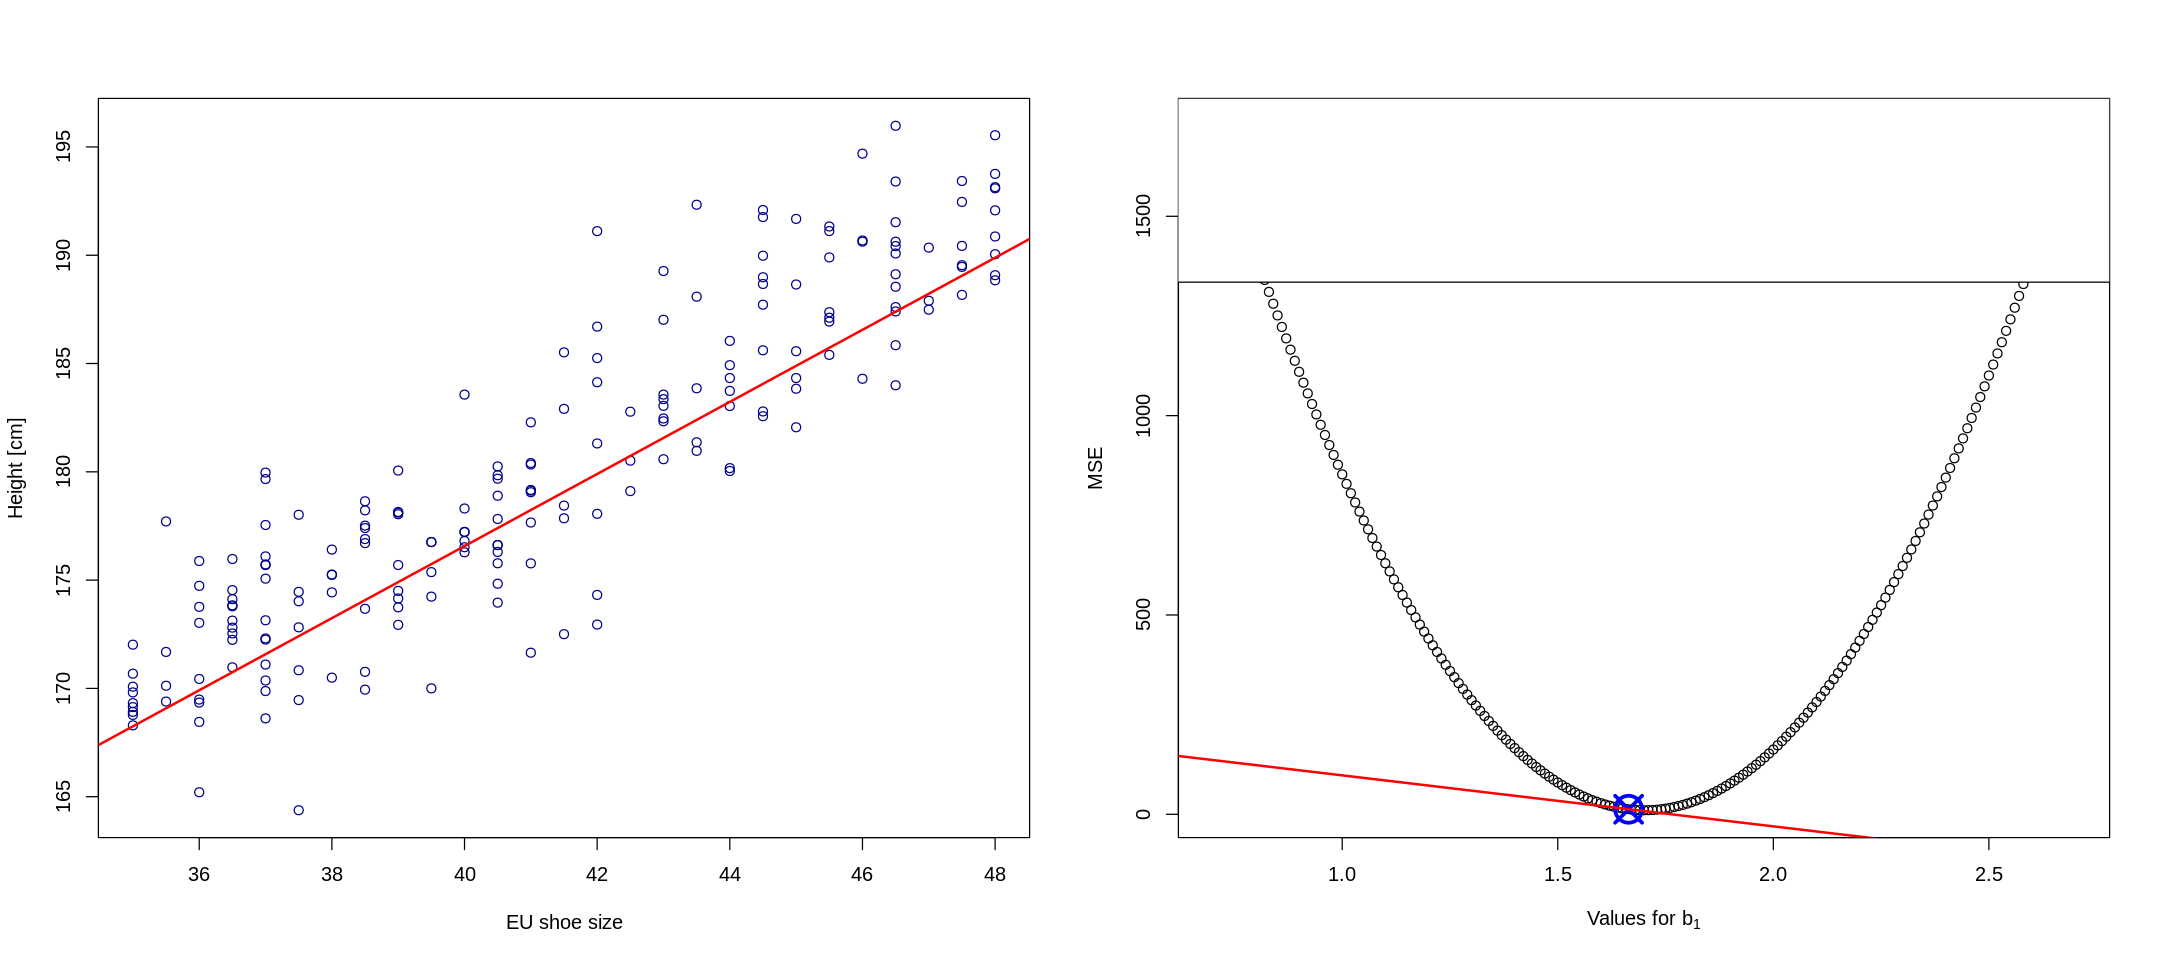

[1] "Iteration 9, current value of b1:1.68551619401951"


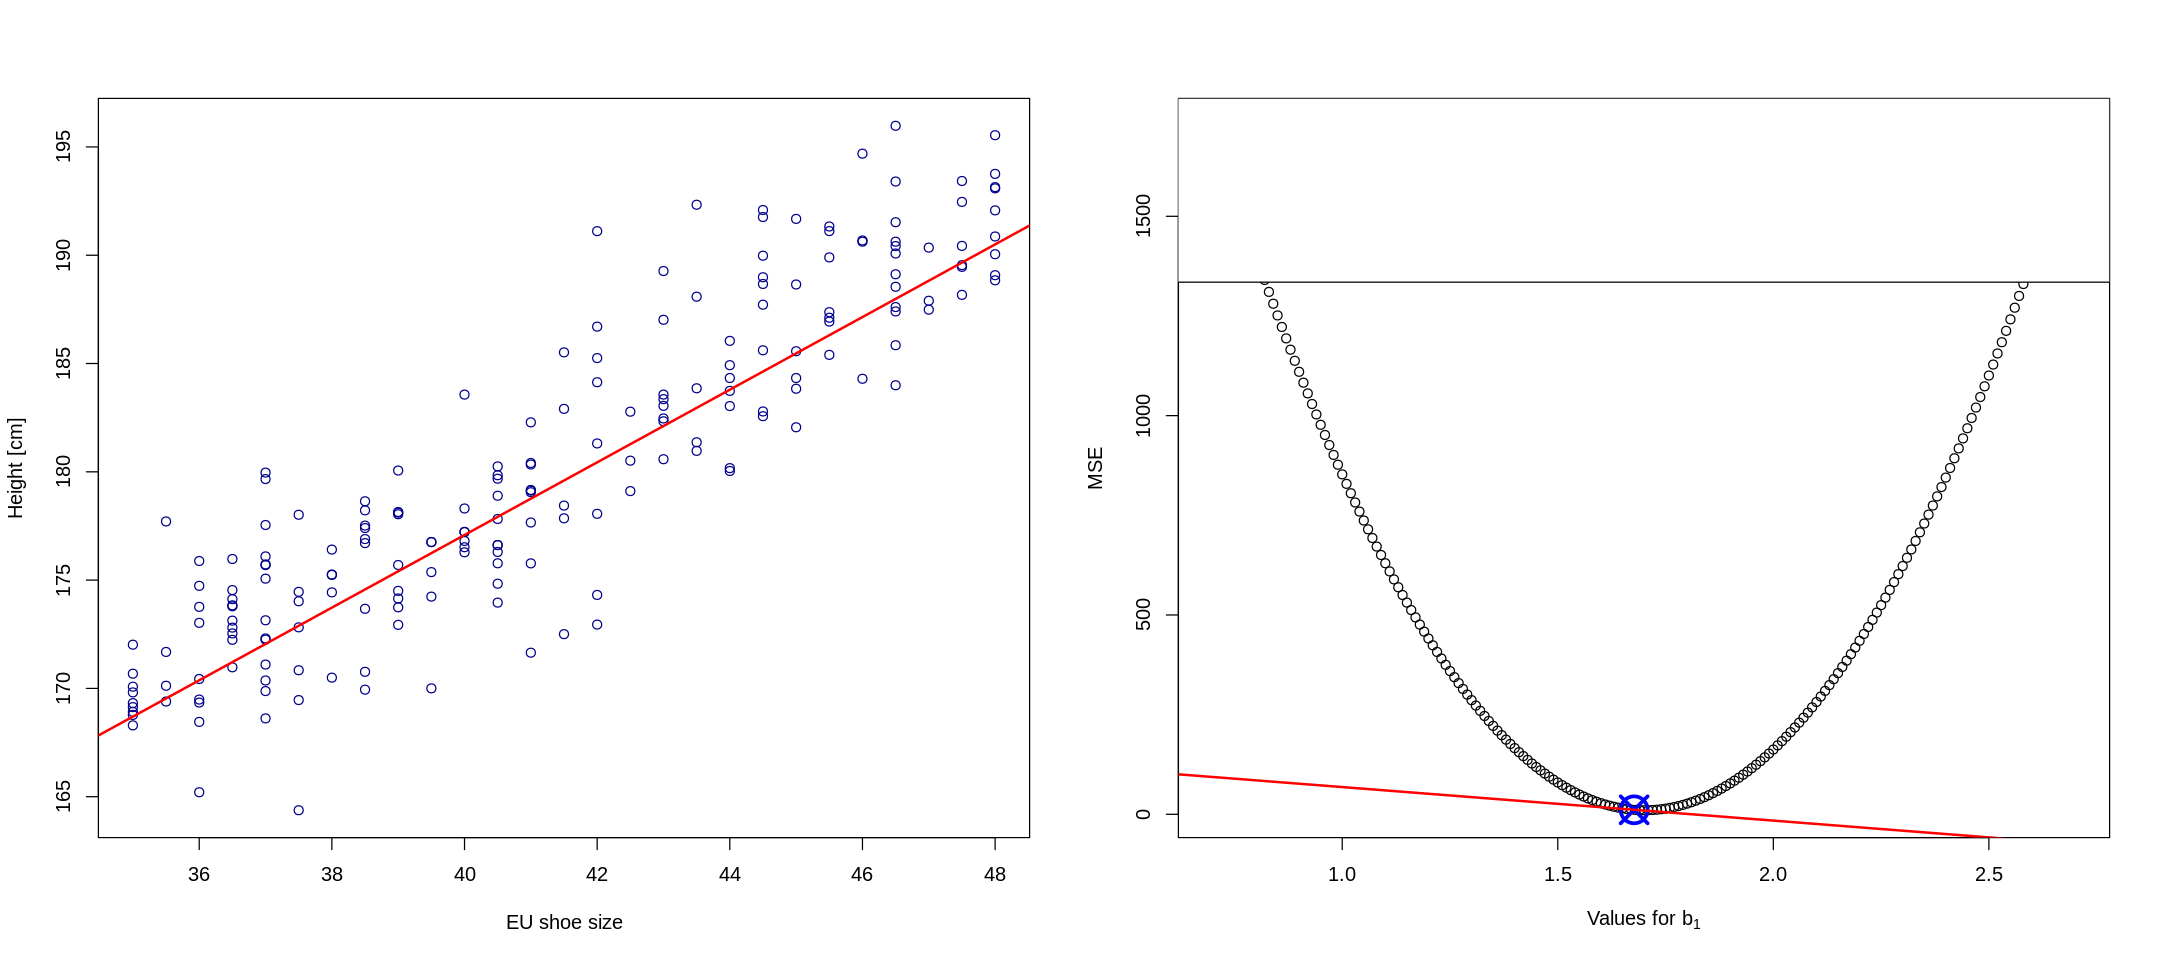

[1] "Iteration 10, current value of b1:1.69105274645101"


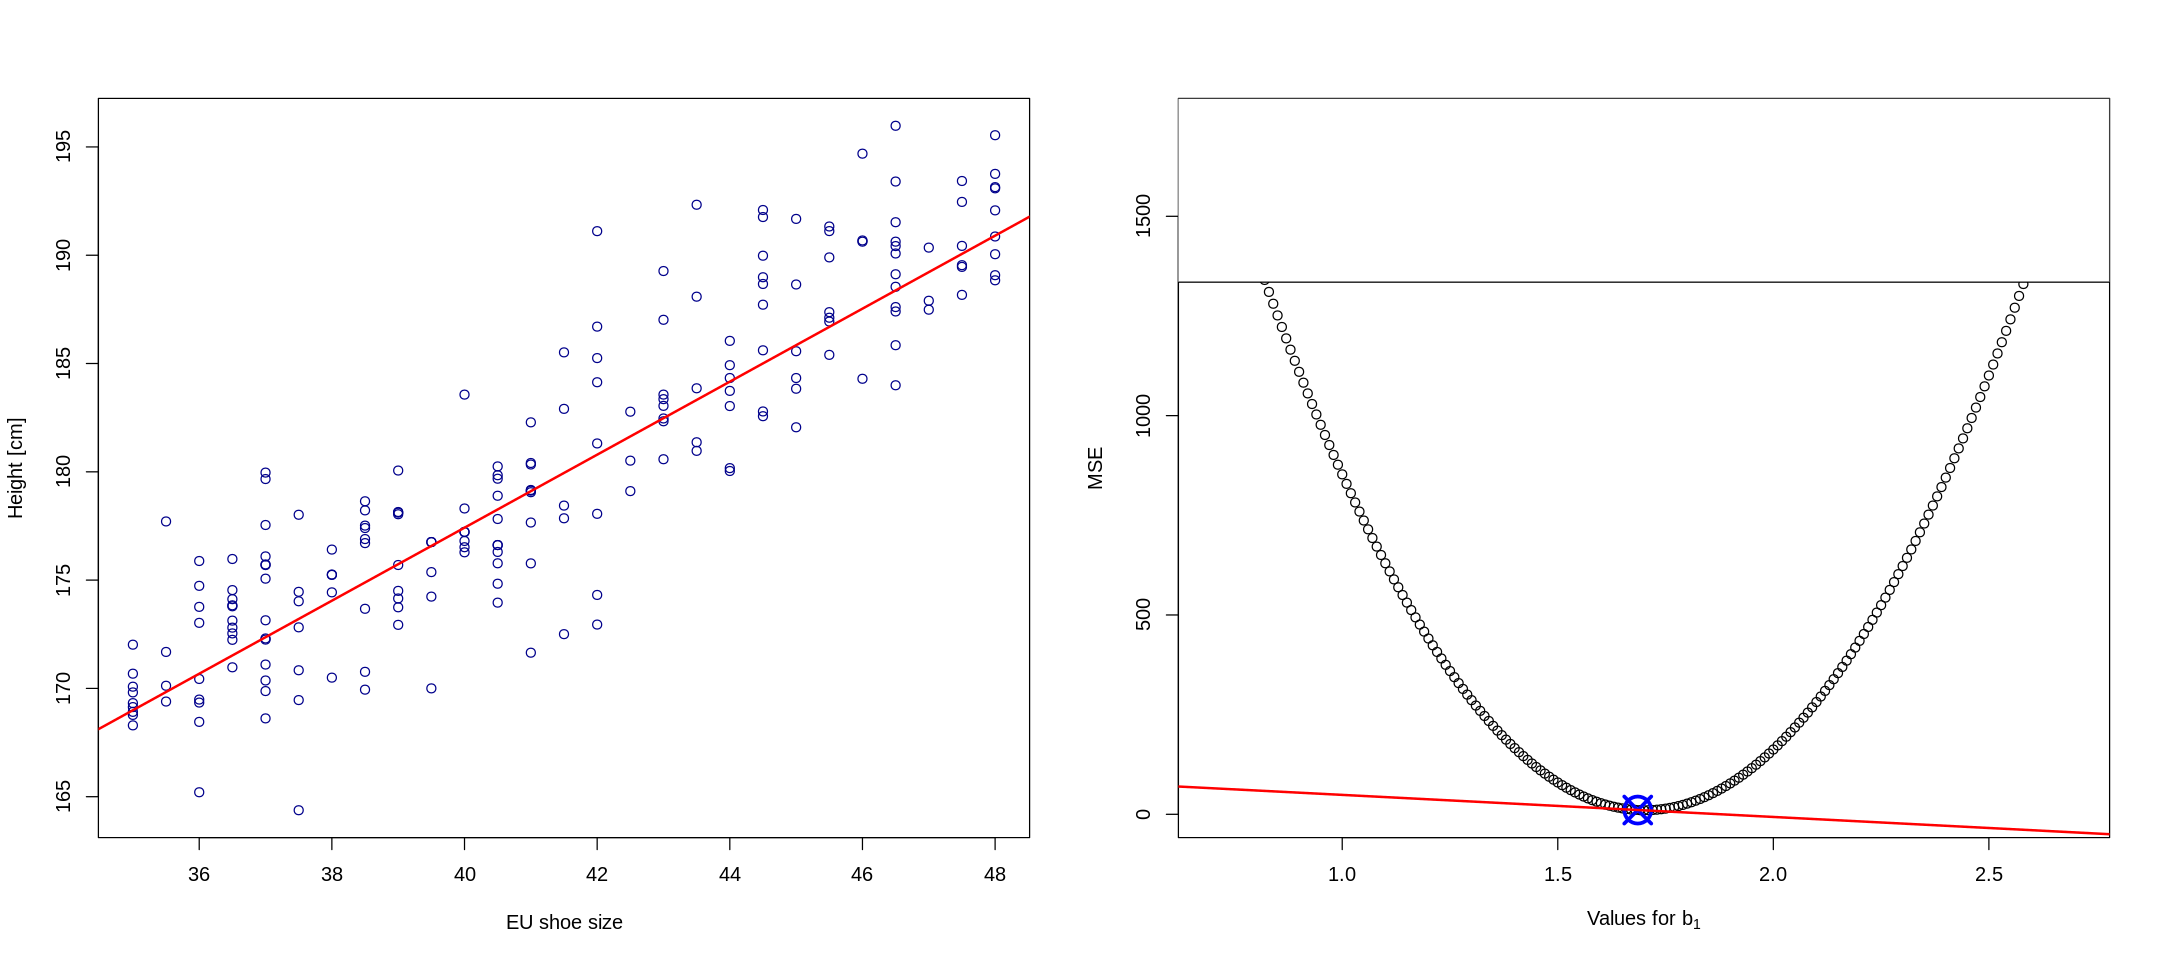

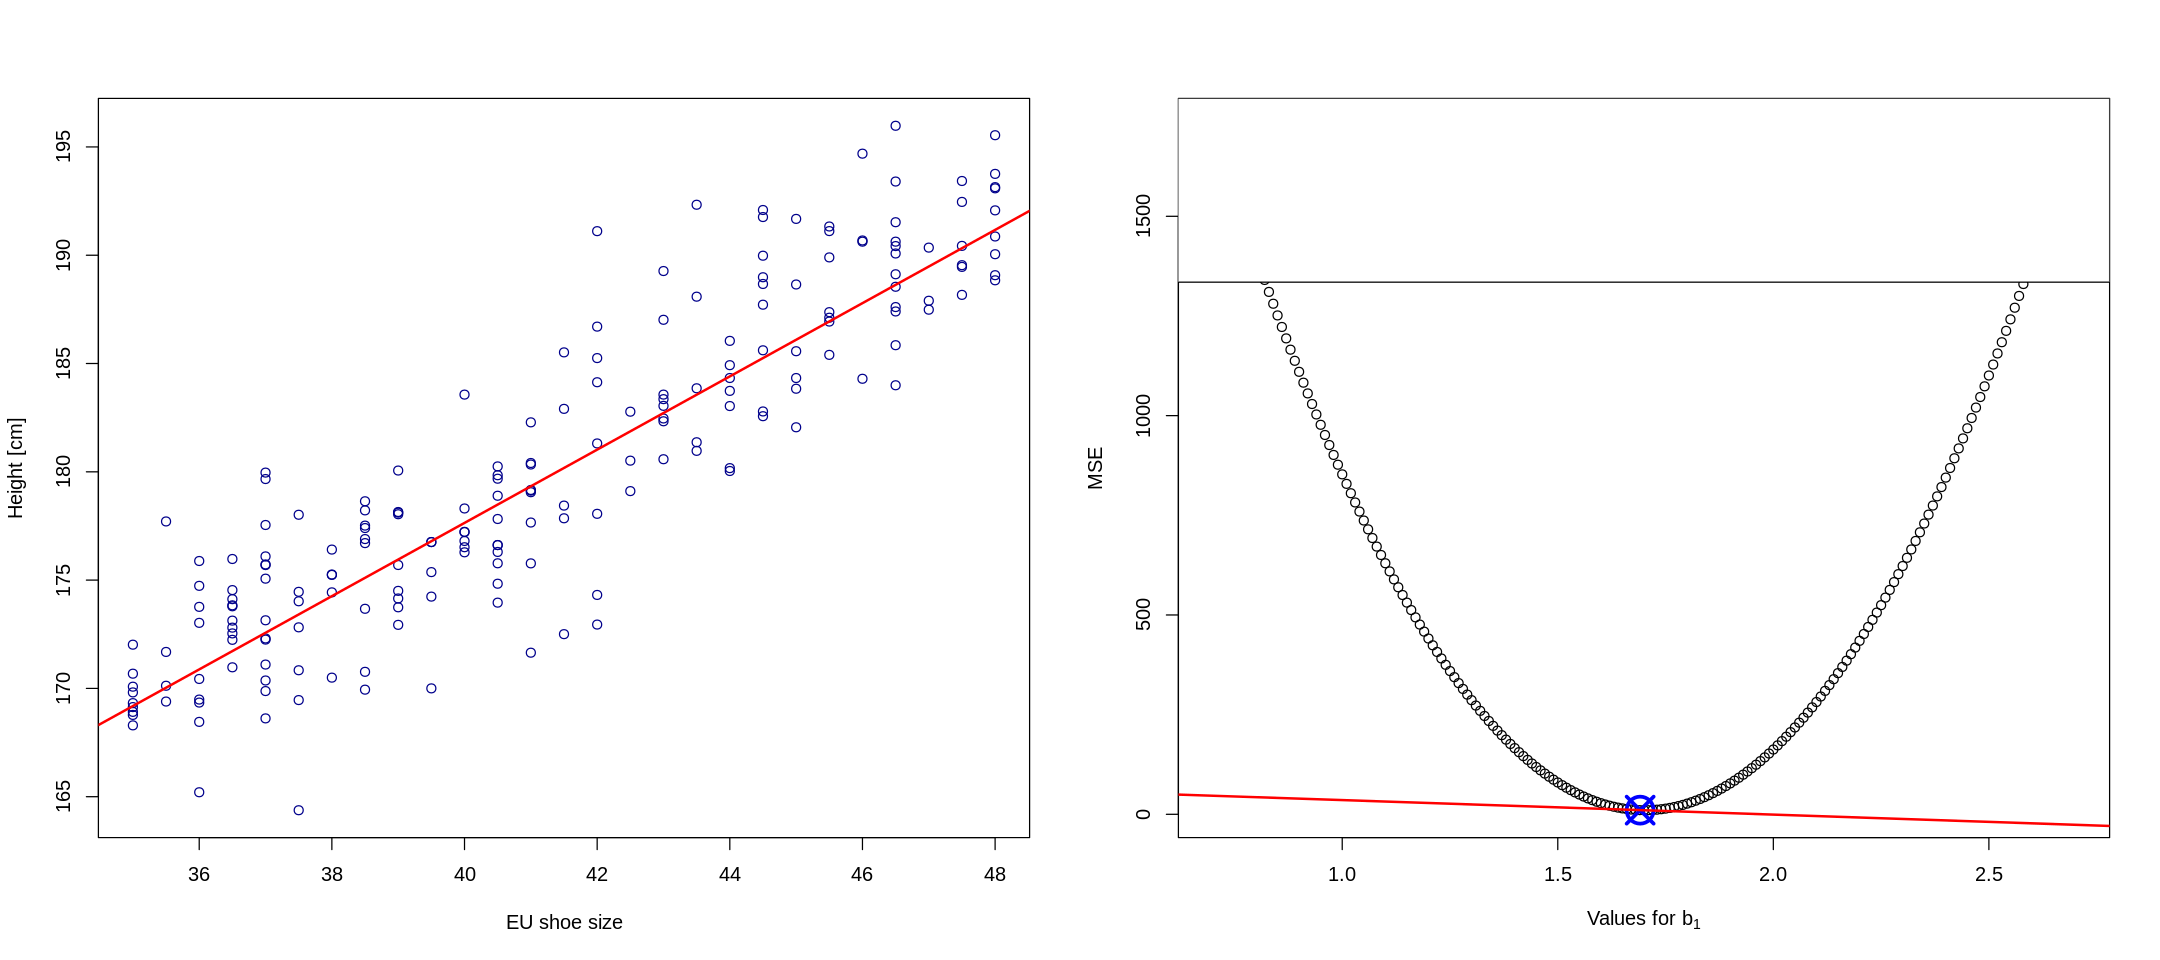

In [13]:
### Set initial b_1 and hyperparameters
b1_init = 1.0
n_iters = 10
alpha = 0.0001

# Increase size of displayed plots
options(repr.plot.width=18, repr.plot.height=8)
# Plot both plots side by side
par(mfrow=c(1,2))

for(iter in 0:n_iters){

  if(iter==0){
    print(paste0("Starting to optimize b1. Initial value for b1: ", b1_init))
    b1 = b1_init
  } else {
    print(paste0("Iteration ", iter,", current value of b1:", b1))
  }
  
  plot_data_regline(x, y, b1)
  plot_cost_at_b1(b1)

  ### Update b1
  b1 = gradient_descent(b1_init = b1, n_iterations = 1)
}